* データマイニング特別演習 第３回 (DM03) データの収集とデータの構造
  * 静的Webページからの情報収集 
  * 動的Webページからの情報収集
    * pythonのライブラリ(selenium)を使ったデータ収集

In [1]:
# Windows の場合：
# ライブラリを pip コマンドを使ってインストール
# pip install selenium  
# pip install chromedriver-binary==112.*  # 112 は インストールされている chrome のバージョン

In [2]:
# Google Colab の場合：
# 以下のコメントアウトを外して実行
# 「Google Colab環境でChromiumを使う方法」から引用
# https://qiita.com/egg_log/items/2f4ad5bc43c94efe4a0b

# %%shell
# # Debian busterを追加
# cat > /etc/apt/sources.list.d/debian.list <<'EOF'
# deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster.gpg] http://deb.debian.org/debian buster main
# deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster-updates.gpg] http://deb.debian.org/debian buster-updates main
# deb [arch=amd64 signed-by=/usr/share/keyrings/debian-security-buster.gpg] http://deb.debian.org/debian-security buster/updates main
# EOF
# # キーを追加
# apt-key adv --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
# apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
# apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A
# apt-key export 77E11517 | gpg --dearmour -o /usr/share/keyrings/debian-buster.gpg
# apt-key export 22F3D138 | gpg --dearmour -o /usr/share/keyrings/debian-buster-updates.gpg
# apt-key export E562B32A | gpg --dearmour -o /usr/share/keyrings/debian-security-buster.gpg

# # DebianのレポジトリからChromiumパッケージを追加
# cat > /etc/apt/preferences.d/chromium.pref << 'EOF'
# Package: *
# Pin: release a=eoan
# Pin-Priority: 500

# Package: *
# Pin: origin "deb.debian.org"
# Pin-Priority: 300

# Package: chromium*
# Pin: origin "deb.debian.org"
# Pin-Priority: 700
# EOF

# # ChromiumとChromium driverをインストール
# apt-get update
# apt-get install chromium chromium-driver
# # pip install chromium-driver==90.*
# pip install google-colab-selenium

# # Seleniumをインストール。
# pip install selenium
# # 日本語フォントをインストール
# apt-get -y install fonts-ipafont-gothic

In [3]:
# ライブラリをインポート
import re
import time
from selenium import webdriver # Windows の場合はコメントアウトを外す
# import google_colab_selenium as webdriver # Google colab の場合はコメントアウトを外す
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.select import Select
import chromedriver_binary # Google colab の場合はコメントアウトする
import matplotlib.pyplot as plt

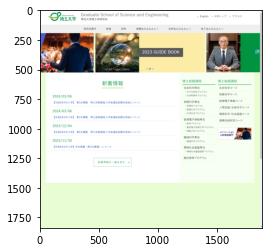

In [4]:
# 動作確認(1) 埼玉大学大学院理工学研究科HPのスクリーンショットを取得
image_file = 'dm03_selenium_screenshot_1.png'
# selenium の初期設定
options = Options()
# Google Colab の場合は、次の2行のコメントアウトを外す (ブラウザが表示されない)
# options.add_argument('--headless')
# options.add_argument('--no-sandbox')

# URLで指定されたWebページをブラウザで表示
driver = webdriver.Chrome(options=options)
driver.get('https://www.saitama-u.ac.jp/rikogaku/')
time.sleep(5) # 5秒スリープ

# ブラウザのスクリーンショットを保存
driver.save_screenshot(image_file)

# selenium のドライバを修了
driver.quit()

# 画像を読込み変数に格納し、表示
image = plt.imread(image_file)
plt.imshow(image)

検索結果 1件目 学部・大学院 | 大学院理工学研究科 | サイトマップ - 埼玉大学


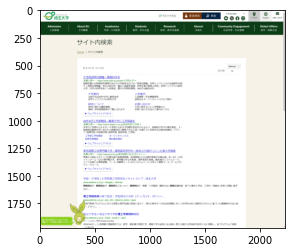

In [6]:
## 動作確認 埼玉大学HPの「検索」で「理工学研究科を」を検索し、検索結果の1件目をクリックして表示
image_file = 'dm03_selenium_screenshot_2.png'
# selenium の初期設定
options = Options()
# Google Colab の場合は、次の2行のコメントアウトを外す (ブラウザが表示されない)
# options.add_argument('--headless')
# options.add_argument('--no-sandbox')

# URLで指定されたWebページをブラウザで表示
driver = webdriver.Chrome(options=options)
driver.set_window_size(1500,1500)
driver.get('https://www.saitama-u.ac.jp/index.html')
time.sleep(1) # 1秒スリープ
# 「検索」をクリック
search_button = driver.find_element(By.CSS_SELECTOR, "#search-box") # #search-box
search_button.click()
time.sleep(1) # 1秒スリープ
# 「理工学研究科」を検索
search = driver.find_element(By.CSS_SELECTOR, "#cse-search-box > input[type=text]:nth-child(4)") 
search.send_keys('理工学研究科') # 検索ワードを送信する
time.sleep(1) # 1秒スリープ
search.submit()                 # 検索を実行
time.sleep(1) # 1秒スリープ
#  検索結果 1件目のテキストを表示 (広告除く)
element = driver.find_element(By.CSS_SELECTOR, "#___gcse_0 > div > div > div > div.gsc-wrapper "
                                              + "> div.gsc-resultsbox-visible > div > div " 
                                              + "> div.gsc-expansionArea > div:nth-child(1) " 
                                              + "> div.gs-webResult.gs-result > div.gsc-thumbnail-inside > div > a")
print('検索結果 1件目', element.text)

# ブラウザのスクリーンショットを保存
driver.save_screenshot(image_file)
# selenium のドライバを修了
driver.quit()

# 画像を読込み変数に格納し、表示
image = plt.imread(image_file)
plt.imshow(image)

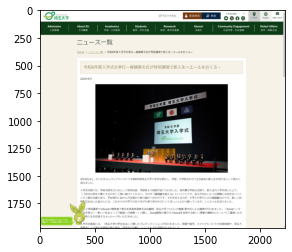

In [13]:
## 動作確認(1) 埼玉大学HPの新着情報の1件目をクリックして表示
image_file = 'dm03_selenium_screenshot_2-1.png'
# selenium の初期設定
options = Options()
# Google Colab の場合は、次の2行のコメントアウトを外す (ブラウザが表示されない)
# options.add_argument('--headless')
# options.add_argument('--no-sandbox')

# URLで指定されたWebページをブラウザで表示
driver = webdriver.Chrome(options=options)

# 埼玉大学HPの新着情報の1件目をクリック
driver.set_window_size(1500,1500)
driver.get('https://www.saitama-u.ac.jp/index.html')
time.sleep(1) # 1秒スリープ
topic = driver.find_element(By.CSS_SELECTOR, "#tab-panel1 > dl > div:nth-child(1) > dd > a") 
driver.execute_script("arguments[0].scrollIntoView();", topic) # topic までスクロール
time.sleep(1) # 1秒スリープ
topic.click()
time.sleep(1) # 1秒スリープ

# ブラウザのスクリーンショットを保存
driver.save_screenshot(image_file)
# selenium のドライバを修了
driver.quit()

# 画像を読込み変数に格納し、表示
image = plt.imread(image_file)
plt.imshow(image)

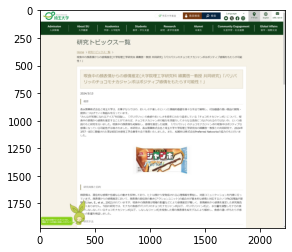

In [27]:
## 動作確認(2) 埼玉大学HPの新着情報の「研究トピックス」を1件目の記事をクリックして表示
image_file = 'dm03_selenium_screenshot_2-1.png'
# selenium の初期設定
options = Options()
# Google Colab の場合は、次の2行のコメントアウトを外す (ブラウザが表示されない)
# options.add_argument('--headless')
# options.add_argument('--no-sandbox')

# URLで指定されたWebページをブラウザで表示
driver = webdriver.Chrome(options=options)

# 埼玉大学HPの新着情報の「研究トピックス」をクリック
driver.set_window_size(1500,1500)
driver.get('https://www.saitama-u.ac.jp/index.html')
driver.execute_script('window.scrollBy(0, 1000);')
tab = driver.find_element(By.CSS_SELECTOR, "#tab3") 
time.sleep(1) # 1秒スリープ
tab.click()
time.sleep(1) # 1秒スリープ
# 「研究トピックス」の1件目をクリック
topic = driver.find_element(By.CSS_SELECTOR, "#tab-panel3 > dl > div:nth-child(1) > dd > a")
topic.click()
time.sleep(1) # 1秒スリープ

# ブラウザのスクリーンショットを保存
driver.save_screenshot(image_file)
# selenium のドライバを修了
driver.quit()

# 画像を読込み変数に格納し、表示
image = plt.imread(image_file)
plt.imshow(image)

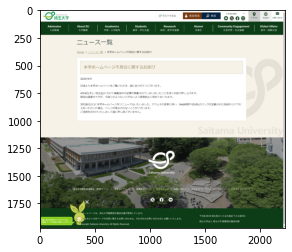

In [32]:
## 動作確認(3) 埼玉大学HPの新着情報の「全てを表示」の3件目の記事を表示
image_file = 'dm03_selenium_screenshot_2-1.png'
# selenium の初期設定
options = Options()
# Google Colab の場合は、次の2行のコメントアウトを外す (ブラウザが表示されない)
# options.add_argument('--headless')
# options.add_argument('--no-sandbox')

# URLで指定されたWebページをブラウザで表示
driver = webdriver.Chrome(options=options)

# 埼玉大学HPを表示
driver.set_window_size(1500,1500)
driver.get('https://www.saitama-u.ac.jp/index.html')
time.sleep(1) # 1秒スリープ
# 新着情報の「全てを表示」をクリック
# tab = driver.find_element(By.CSS_SELECTOR, "body > div.main > div.news_area > div.news_left > div > label:nth-child(2)")
# tab.click()
# time.sleep(1) # 1秒スリープ
# 3件目の記事をクリック
driver.execute_script('window.scrollBy(0, 1300);')
time.sleep(1) # 1秒スリープ
topic = driver.find_element(By.CSS_SELECTOR, "#tab-panel1 > dl > div:nth-child(3) > dd > a") 
topic.click()
time.sleep(1) # 1秒スリープ

# ブラウザのスクリーンショットを保存
driver.save_screenshot(image_file)
# selenium のドライバを終了
driver.quit()

# 画像を読込み変数に格納し、表示
image = plt.imread(image_file)
plt.imshow(image)

In [44]:
## 動作確認(4) 埼玉大学HPの新着情報の全ての記事のURLのリストを作成・表示
image_file = 'dm03_selenium_screenshot_2-1.png'
# selenium の初期設定
options = Options()
# Google Colab の場合は、次の2行のコメントアウトを外す (ブラウザが表示されない)
# options.add_argument('--headless')
# options.add_argument('--no-sandbox')

# URLで指定されたWebページをブラウザで表示
driver = webdriver.Chrome(options=options)

# 埼玉大学HPの新着情報の全ての記事のURLのリストを作成
url_list = [] # リストを初期化
driver.set_window_size(1500,1500)
driver.get('https://www.saitama-u.ac.jp/index.html')
time.sleep(1) # 1秒スリープ
elements = driver.find_elements(By.CSS_SELECTOR, "#tab-panel1")
for element in elements:
    a_tags = element.find_elements(By.TAG_NAME, "a")
    for a_tag in a_tags:
        url = a_tag.get_attribute("href")
        url_list.append(url)
driver.quit()

for url in url_list:
    print(url)
print('total', len(url))


https://www.saitama-u.ac.jp/news_archives/b2b815b5dff99ac2d8e31d79be46fb1df4dbca5a.html
https://www.saitama-u.ac.jp/international/archives/eee22ef26ed1101c3676e85dca7691c431b49f72.html
https://www.saitama-u.ac.jp/news_archives/019286ae4d35b1373620ba76db8ca90e3da773f0.html
https://www.saitama-u.ac.jp/news_archives/202403-210.html
https://www.saitama-u.ac.jp/news_archives/202403-256.html
https://www.saitama-u.ac.jp/news_archives/202403-253.html
https://www.saitama-u.ac.jp/media_archives/202403-251.html
https://www.saitama-u.ac.jp/exam_archives/202403-250.html
https://www.saitama-u.ac.jp/news_archives/202403-248.html
https://www.saitama-u.ac.jp/news_archives/202403-249.html
https://www.saitama-u.ac.jp/info_archives/
total 42


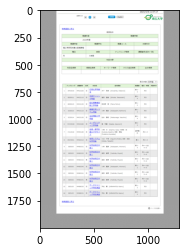

## 検索されたシラバスのリスト
応用化学特論Ⅲ https://risyu.saitama-u.ac.jp/Portal/Public/Syllabus/DetailMain.aspx?lct_year=2024&lct_cd=MM23260&je_cd=1
光波センシング特論 https://risyu.saitama-u.ac.jp/Portal/Public/Syllabus/DetailMain.aspx?lct_year=2024&lct_cd=MM32110&je_cd=1
超伝導集積回路工学特論 https://risyu.saitama-u.ac.jp/Portal/Public/Syllabus/DetailMain.aspx?lct_year=2024&lct_cd=MM32150&je_cd=1
画像応用システム特論 https://risyu.saitama-u.ac.jp/Portal/Public/Syllabus/DetailMain.aspx?lct_year=2024&lct_cd=MM33110&je_cd=1
生命情報工学特論 https://risyu.saitama-u.ac.jp/Portal/Public/Syllabus/DetailMain.aspx?lct_year=2024&lct_cd=MM33150&je_cd=1
ユーザビリティ工学特論 https://risyu.saitama-u.ac.jp/Portal/Public/Syllabus/DetailMain.aspx?lct_year=2024&lct_cd=MM40280&je_cd=1
地域・都市計画エクササイズ https://risyu.saitama-u.ac.jp/Portal/Public/Syllabus/DetailMain.aspx?lct_year=2024&lct_cd=MM50180&je_cd=1
地球システム科学特論 https://risyu.saitama-u.ac.jp/Portal/Public/Syllabus/DetailMain.aspx?lct_year=2024&lct_cd=MM60010&je_cd=1
科学技術日本語Ⅰ https://risyu.saitama-u.ac.jp/Portal/Pu

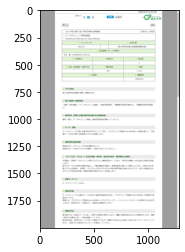

In [24]:
# 埼玉大学シラバス検索 で 条件を指定して科目を検索
image_file = 'dm03_selenium_screenshot_3.png'
image_file_2 = 'dm03_selenium_screenshot_4.png'

# selenium の初期設定
options = Options()
# Google Colab の場合は、次の2行のコメントアウトを外す (ブラウザが表示されない)
options.add_argument('--headless') # ブラウザを表示しない場合は、指定サイズの画像が保存可能
options.add_argument('--no-sandbox') 

# URLで指定されたWebページをブラウザで表示
driver = webdriver.Chrome(options=options)
driver.set_window_size(1280,2000)
driver.get('http://syllabus.saitama-u.ac.jp/portal/public/syllabus/')
time.sleep(1) # 1秒スリープ

# ドロップダウンで条件を設定
dropdown_1 = driver.find_element(By.CSS_SELECTOR, '#ctl00_phContents_ddl_fac') # 開講学部
select_1 = Select(dropdown_1)
select_1.select_by_visible_text('理工学研究科博士前期課程') 
time.sleep(1) # 1秒スリープ
dropdown_2 = driver.find_element(By.CSS_SELECTOR, '#ctl00_phContents_ddl_day') # 曜日
select_2 = Select(dropdown_2)
select_2.select_by_visible_text('月') 
time.sleep(1) # 1秒スリープ
dropdown_3 = driver.find_element(By.CSS_SELECTOR, '#ctl00_phContents_ddl_time') # 時限
select_3 = Select(dropdown_3)
select_3.select_by_visible_text('　５時限') 
time.sleep(1) # 1秒スリープ

# 「検索」をクリック
search_button = driver.find_element(By.CSS_SELECTOR, "#ctl00_phContents_ctl06_btnSearch")
search_button.click()
time.sleep(1) # 1秒スリープ

# ブラウザのスクリーンショット(検索結果)を保存して表示
driver.save_screenshot(image_file)
image = plt.imread(image_file)
plt.imshow(image)
plt.show()

# 検索結果中のリンク=(ほぼ科目名)を表示
print('## 検索されたシラバスのリスト')
text_list = [] # リストを初期化
url_list = [] # リストを初期化
a_tags = driver.find_elements(By.TAG_NAME, "a")
for a_tag in a_tags:
    url = a_tag.get_attribute("href")
    if re.search(r'^https', str(url)): # 科目へのリンクの先頭がhttpsではじまるもののみ表示
        print(a_tag.text, url)
        text_list.append(a_tag.text)
        url_list.append(url)

# 検索結果の最後をクリックして、新しく表示されたウインドウのスクリーンショットを取得
if len(url_list) > 0: # 検索結果がゼロだったら実行しない
    print('## 検索結果の最後をクリックし、その科目のシラバスを表示')
    print('##', text_list[-1], url_list[-1], len(driver.window_handles))
    element = driver.find_element(By.LINK_TEXT, text_list[-1])
    element.click()
    time.sleep(1) # 1秒スリープ
    print('##', len(driver.window_handles)) # driver.window_handles が 1 から 2 になると、新しいウインドウが作成されている
    driver.switch_to.window(driver.window_handles[1]) # 操作対象を新しいウインドウに切り替える
    driver.set_window_size(1280,2000) # 新しいウインドウのサイズを変更

    # ブラウザのスクリーンショット(検索結果)を保存して表示
    driver.save_screenshot(image_file_2)
    image = plt.imread(image_file_2)
    plt.imshow(image)
    plt.show()

# selenium のドライバを修了
driver.quit()
